# Josephus Problem

## Introduction

The Josephus Problem is introduced in this [Numberphile video (youtu.be/uCsD3ZGzMgE)](https://youtu.be/uCsD3ZGzMgE).

There is a circle of $41$ soldiers, and they will sequentially kill the next living soldier to their right, until only one soldier remains.  If you want to remain alive at the end, which position in the circle should you pick?

In [1]:
# Symbols
from sympy import *
from sympy.plotting import plot_parametric
import numpy as np
import scipy
import scipy.special

init_printing(use_unicode=True)

x,y,z,t,mu,nu=symbols('x y z t mu nu')
k,m,n=symbols('k m n', integer=True)
f,g,h=symbols('f g h', cls=Function)

R=S.Reals
C=S.Complexes

i=sqrt(-1)

In [2]:
# Plotting Setup
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [3]:
from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.pyplot as plt
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 3, 3

## Representation

In [4]:
import networkx as nx

The Josephus problem state will be defined as a tuple $(i,G)$ where $i$ is the node about to kill, and $G$ is a directed graph with edges from killers to victims.

In [5]:
def setup(n):
    G = nx.empty_graph(n, create_using = nx.DiGraph)
    return (0,G)

It follows from our definition that a node is alive if it has no edges directed into it.

In [6]:
def is_alive(i, G):
    return not any(True for _ in G.predecessors(i))
def next_alive(i, G):
    l = G.order()
    j = (i + 1) % l
    while j != i:
        if is_alive(j, G):
            return j
        j = (j + 1) % l
    return i

Such a state will be drawn as the digraph, with the next killer marked.

In [7]:
def draw(jp):
    G = jp[1]
    ca = lambda v: ('c' if v == jp[0] 
                    else ('y' if is_alive(v, G) 
                          else 'm'))
    colors = [ca(v) for v in G]
    nx.draw_circular(G, with_labels=True, node_color=colors, label='X')

To advance the problem state, we add an edge from the current killer to the next living node, and then advance the current killer to the new, next killer.

In [8]:
def next(jp):
    G = jp[1].copy()
    i = jp[0]
    l = G.order()
    a = next_alive(i, G)
    if i == a:
        return (i, G)
    G.add_edge(i, a, weight = G.degree)
    return (next_alive(a, G), G)

The problem is solved, when only one node remains alive.

In [9]:
def finish(jp):
    i = -1
    while jp[0] != i:
        i = jp[0]
        jp = next(jp)
    return jp

## Sample runs

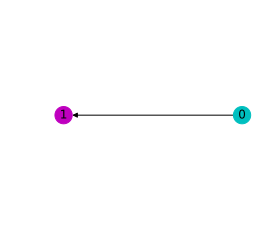

In [10]:
draw(finish(setup(2)))

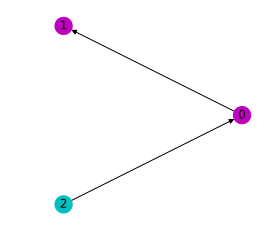

In [11]:
draw(finish(setup(3)))

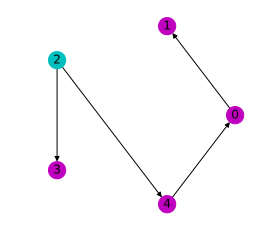

In [12]:
draw(finish(setup(5)))

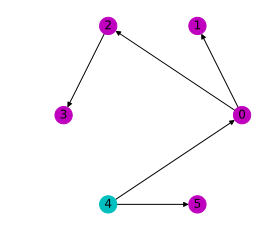

In [13]:
draw(finish(setup(6)))

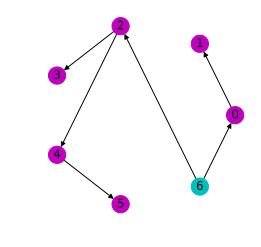

In [14]:
draw(finish(setup(7)))

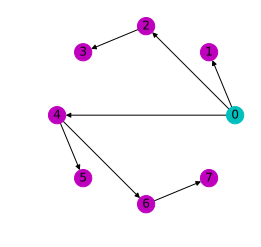

In [15]:
draw(finish(setup(8)))

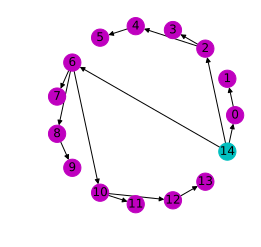

In [16]:
draw(finish(setup(15)))

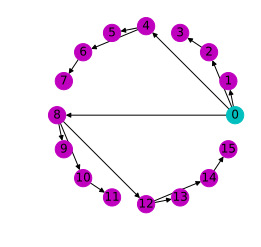

In [17]:
draw(finish(setup(16)))

## Original problem

Now we can see that our solution to the $41$-soldier problem shows the living soldier is number $18$ in a $0$-based index, which matches the video's $19$ in a $1$-based index. 

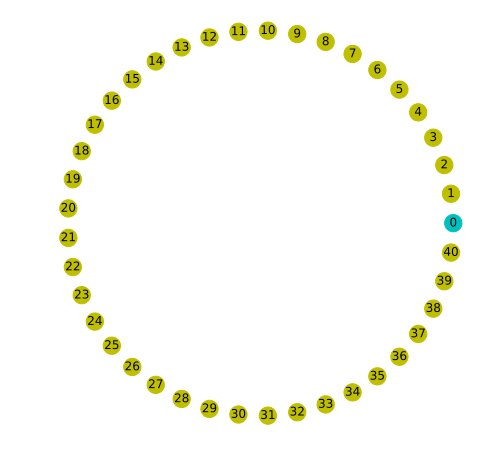

In [18]:
jp = setup(41)
plt.rcParams['figure.figsize'] = 6, 6
draw(jp)

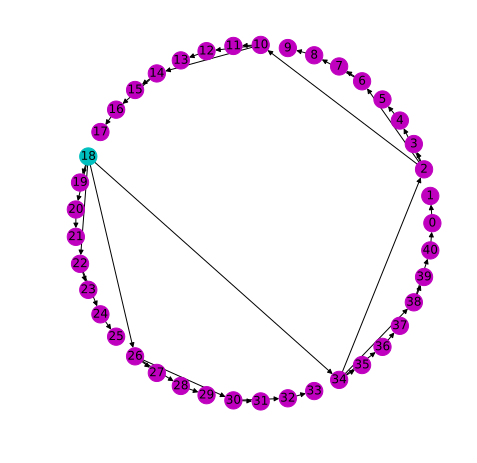

In [19]:
jp = finish(jp)
draw(jp)

## Sequence

Now we see the pattern for the survivor index for circles of various numbers of soldiers.

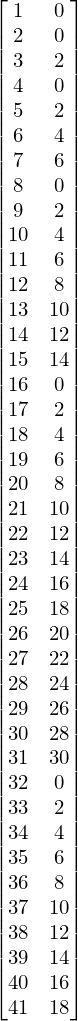

In [20]:
def survivor(i):
    return finish(setup(i))[0]
def seq(n):
    return [[i+1, survivor(i+1)] for i in range(n)]
Matrix(seq(41))